# Importing Libraries
Importing all the necessary modules required for making the machine learning model

In [165]:

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split


# Data Preprocessing and EDA
Performing the necessary preprocessing of the data and analysing it in order to get helpful observations regarding the dataset.

In [111]:
df=pd.read_csv("events.csv")
df.columns


Index(['id_odsp', 'id_event', 'sort_order', 'time', 'text', 'event_type',
       'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2',
       'player_in', 'player_out', 'shot_place', 'shot_outcome', 'is_goal',
       'location', 'bodypart', 'assist_method', 'situation', 'fast_break'],
      dtype='object')

In [112]:
df.shape

(941009, 22)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_odsp        941009 non-null  object 
 1   id_event       941009 non-null  object 
 2   sort_order     941009 non-null  int64  
 3   time           941009 non-null  int64  
 4   text           941009 non-null  object 
 5   event_type     941009 non-null  int64  
 6   event_type2    214293 non-null  float64
 7   side           941009 non-null  int64  
 8   event_team     941009 non-null  object 
 9   opponent       941009 non-null  object 
 10  player         880009 non-null  object 
 11  player2        291310 non-null  object 
 12  player_in      51715 non-null   object 
 13  player_out     51738 non-null   object 
 14  shot_place     227459 non-null  float64
 15  shot_outcome   228498 non-null  float64
 16  is_goal        941009 non-null  int64  
 17  location       467067 non-nul

## Dropping unwanted columns

In [114]:
df=df.drop(['id_event','sort_order','text','fast_break','player','player2','player_in','player_out','bodypart','assist_method','situation','location'],axis=1)

## Dealing with null values 

In [115]:
df.head()

,id_odsp,time,event_type,event_type2,side,event_team,opponent,shot_place,shot_outcome,is_goal
0,UFot0hit/,2,1,12.0,2,Hamburg SV,Borussia Dortmund,6.0,2.0,0
1,UFot0hit/,4,2,NaN,1,Borussia Dortmund,Hamburg SV,NaN,NaN,0
2,UFot0hit/,4,2,NaN,1,Borussia Dortmund,Hamburg SV,NaN,NaN,0
3,UFot0hit/,7,3,NaN,1,Borussia Dortmund,Hamburg SV,NaN,NaN,0
4,UFot0hit/,7,8,NaN,2,Hamburg SV,Borussia Dortmund,NaN,NaN,0


In [117]:
df=df.interpolate(method='linear',limit_direction='forward')

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_30624\3601318277.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df=df.interpolate(method='linear',limit_direction='forward')


In [118]:
df.isnull().sum()

id_odsp         0
time            0
event_type      0
event_type2     0
side            0
event_team      0
opponent        0
shot_place      0
shot_outcome    0
is_goal         0
dtype: int64

In [119]:
df.tail()

,id_odsp,time,event_type,event_type2,side,event_team,opponent,shot_place,shot_outcome,is_goal
941004,z5L2OT5E/,92,8,12.0,2,Sampdoria,Atalanta,7.538462,1.846154,0
941005,z5L2OT5E/,93,2,12.0,2,Sampdoria,Atalanta,7.769231,1.923077,0
941006,z5L2OT5E/,93,1,12.0,2,Sampdoria,Atalanta,8.000000,2.000000,0
941007,z5L2OT5E/,94,8,12.0,1,Atalanta,Sampdoria,8.000000,2.000000,0
941008,z5L2OT5E/,94,3,12.0,2,Sampdoria,Atalanta,8.000000,2.000000,0


In [120]:
df.reset_index(inplace=True)

In [121]:
df.head()

,index,id_odsp,time,event_type,event_type2,side,event_team,opponent,shot_place,shot_outcome,is_goal
0,0,UFot0hit/,2,1,12.0,2,Hamburg SV,Borussia Dortmund,6.000000,2.0,0
1,1,UFot0hit/,4,2,12.0,1,Borussia Dortmund,Hamburg SV,6.636364,2.0,0
2,2,UFot0hit/,4,2,12.0,1,Borussia Dortmund,Hamburg SV,7.272727,2.0,0
3,3,UFot0hit/,7,3,12.0,1,Borussia Dortmund,Hamburg SV,7.909091,2.0,0
4,4,UFot0hit/,7,8,12.0,2,Hamburg SV,Borussia Dortmund,8.545455,2.0,0


In [122]:
df.drop(['index'],axis=1,inplace=True)

In [171]:
encoding = pd.read_table('dictionary.txt')
event_type=encoding[1:12]
event_type_2=encoding[13:17]
side=encoding[18:20]
shot_place=encoding[21:34]
shot_outcome=encoding[35:39]


## Analysis

In [124]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,941009.0,49.663663,26.488977,0.0,27.000000,51.0,73.000000,100.0
event_type,941009.0,4.326575,2.995313,1.0,2.000000,3.0,8.000000,11.0
event_type2,941009.0,12.237666,0.400198,12.0,12.000000,12.0,12.409091,15.0
side,941009.0,1.481170,0.499646,1.0,1.000000,1.0,2.000000,2.0
shot_place,941009.0,5.793914,2.809382,1.0,3.400000,5.5,8.000000,13.0
shot_outcome,941009.0,1.914259,0.663624,1.0,1.333333,2.0,2.333333,4.0
is_goal,941009.0,0.025978,0.159071,0.0,0.000000,0.0,0.000000,1.0


In [125]:
cat_cols=df.select_dtypes(include=['object']).columns
num_col=df.select_dtypes(include=np.number).columns
print('Categorial Data \n',cat_cols)
print('Numerical Data \n',num_col)

Categorial Data 
 Index(['id_odsp', 'event_team', 'opponent'], dtype='object')
Numerical Data 
 Index(['time', 'event_type', 'event_type2', 'side', 'shot_place',
       'shot_outcome', 'is_goal'],
      dtype='object')


### Heatmap Analysis


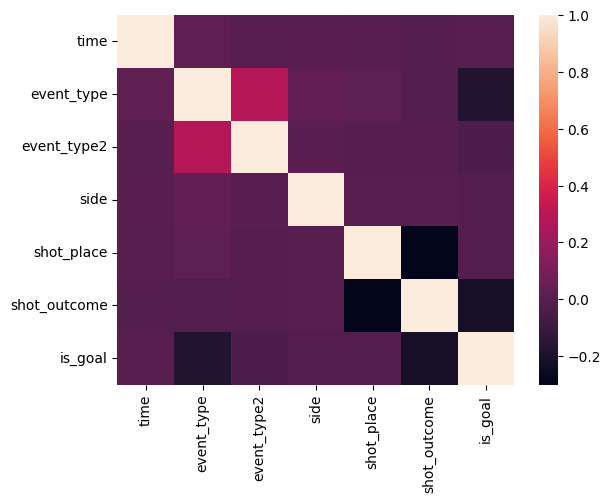

In [126]:
plt.figure()
sns.heatmap(df.drop(['id_odsp','event_team','opponent'],axis=1).corr())
plt.show()

### Number of goals by a team

In [172]:
fin=df.loc[df.is_goal==1]
team_names=fin['event_team'].value_counts().index
team_goals=fin['event_team'].value_counts().values



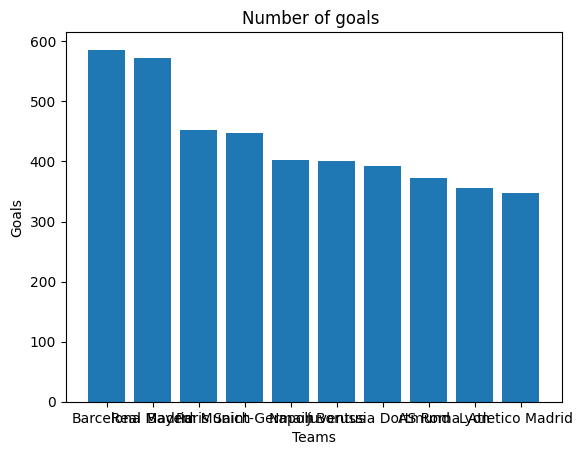

In [128]:
plt.bar(team_names[:10],team_goals[:10])
plt.title("Number of goals ")
plt.xlabel("Teams")
plt.ylabel("Goals")
plt.show()

([<matplotlib.patches.Wedge at 0x26a325bcd90>,
 [Text(1.0020668207521366, 0.4537202736793953, 'Barcelona'),
  Text(0.3300362432276406, 1.0493217229030312, 'Real Madrid'),
  Text(-0.4682128234325102, 0.9953776931262611, 'Bayern Munich'),
  Text(-0.9766418250882231, 0.5061331302022668, 'Paris Saint-Germain'),
  Text(-1.0894547119875175, -0.1519487760009786, 'Napoli'),
  Text(-0.8255969942774876, -0.7269041223159891, 'Juventus'),
  Text(-0.2971439609404355, -1.0591059750924972, 'Borussia Dortmund'),
  Text(0.30558711018903345, -1.056700770363264, 'AS Roma'),
  Text(0.7964912120482406, -0.7586842222755953, 'Lyon'),
  Text(1.0653222992520095, -0.27402262446084996, 'Atletico Madrid')])

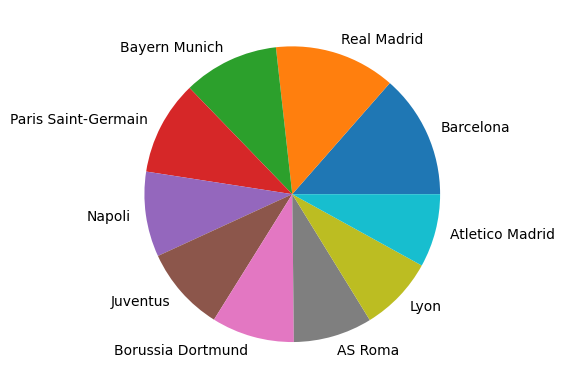

In [129]:
plt.pie(team_goals[:10],labels=team_names[:10])

### Shot placed versus its outcome

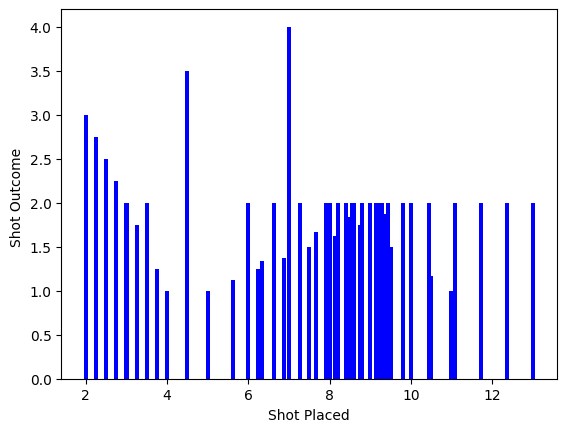

In [130]:
plt.bar(df['shot_place'][:100],df['shot_outcome'][:100],color='blue',width=0.1)
plt.xlabel("Shot Placed")
plt.ylabel("Shot Outcome ")
plt.show()


### Number of goals placed against Time

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


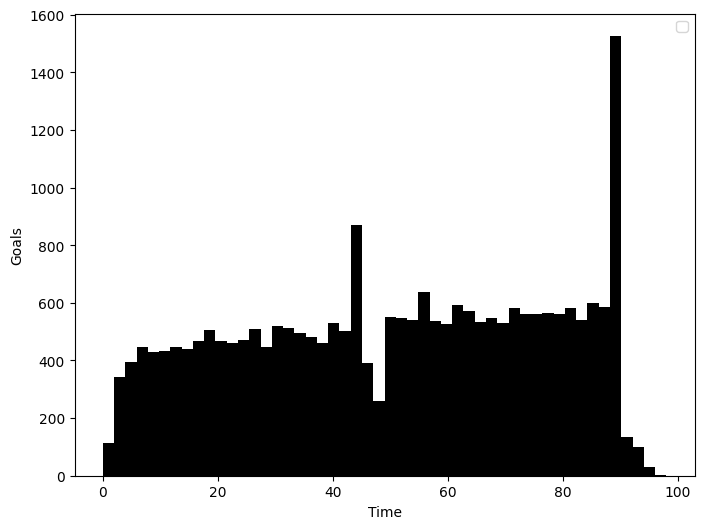

In [131]:
fig=plt.figure(figsize=(8,6))
goals=df[df['is_goal']==1]
plt.hist(goals['time'],bins=50,color='black')
plt.xlabel('Time')
plt.ylabel('Goals')
plt.legend()

### Home Vs Away Goal Comparison Against Time

Text(0.5, 1.0, 'Number of goals by home and away vs Time')

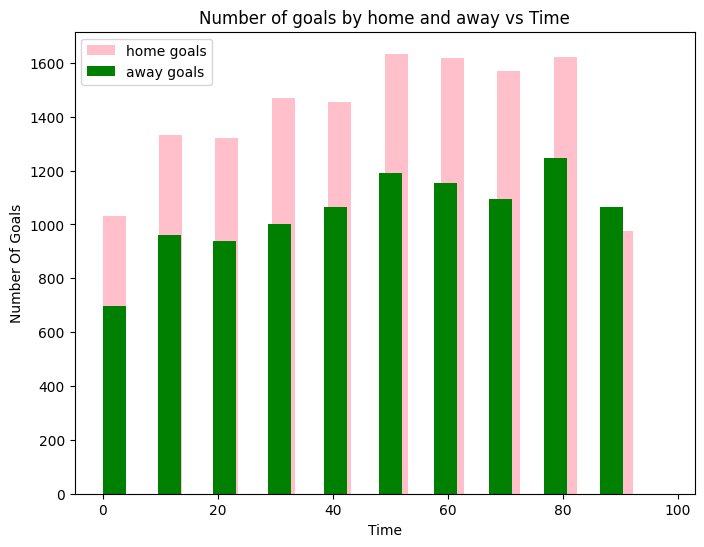

In [132]:
fig=plt.figure(figsize=(8,6))

goals=df[df['is_goal']==1]
plt.hist(goals[goals['side']==1]['time'],width=4,color='pink',label='home goals')
plt.hist(goals[goals['side']==2]['time'],width=4,color='green',label='away goals')
plt.xlabel("Time")
plt.ylabel("Number Of Goals")
plt.legend()
plt.title("Number of goals by home and away vs Time")

### Comparison of Goal or Not Goal

([<matplotlib.patches.Wedge at 0x26a34c230d0>,
 [Text(1.0963385809283257, 0.08967561523661484, 'Is a goal'),
  Text(-1.0963385830273347, -0.08967558957495832, 'Is not a Goal')])

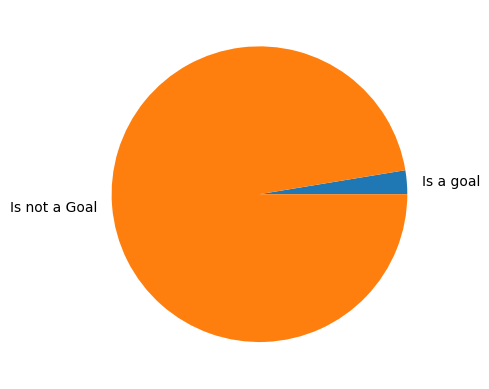

In [133]:
goalyes=len(df[df['is_goal']==1])
goalno=len(df[df['is_goal']==0])
goals=[goalyes,goalno]
plt.pie(goals,labels=['Is a goal','Is not a Goal'])



# Predictive Modelling

In [134]:
dfa=pd.read_csv('ginf.csv')
dfa.columns

Index(['id_odsp', 'link_odsp', 'adv_stats', 'date', 'league', 'season',
       'country', 'ht', 'at', 'fthg', 'ftag', 'odd_h', 'odd_d', 'odd_a',
       'odd_over', 'odd_under', 'odd_bts', 'odd_bts_n'],
      dtype='object')

In [135]:
dfa.drop(['id_odsp', 'link_odsp', 'adv_stats', 'season','odd_over', 'odd_under', 'odd_bts', 'odd_bts_n'],axis=1,inplace=True)

In [136]:
dfa

,date,league,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a
0,2011-08-05,D1,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42
1,2011-08-06,D1,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40
2,2011-08-06,D1,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80
3,2011-08-06,F1,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40
4,2011-08-06,F1,france,Caen,Valenciennes,1,0,2.50,3.40,3.45
...,...,...,...,...,...,...,...,...,...,...
10107,2017-01-22,I1,italy,Genoa,Crotone,2,2,1.97,4.35,8.00
10108,2017-01-22,E0,england,Chelsea,Hull,2,0,1.19,8.50,20.00
10109,2017-01-22,F1,france,AS Monaco,Lorient,4,0,1.32,6.24,11.50
10110,2017-01-22,SP1,spain,Real Betis,Sporting Gijon,0,0,1.74,4.07,5.90


In [137]:
dfa['result'] = dfa.apply(lambda x:1 if x['fthg']>x['ftag'] else (-1 if x['fthg']<x['ftag'] else 0),axis=1)

In [138]:
dfa.head()

,date,league,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,result
0,2011-08-05,D1,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,1
1,2011-08-06,D1,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,0
2,2011-08-06,D1,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,1
3,2011-08-06,F1,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,-1
4,2011-08-06,F1,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,1


In [139]:
X=dfa.drop(['result'],axis=1)
Y=dfa['result']


In [140]:
cat_col2=['league','country','ht','at']
num_col2=['fthg','ftag','odd_h','odd_d','odd_a']
print('Categorial Data',cat_col2)
print('Numerical Data',num_col2)

Categorial Data ['league', 'country', 'ht', 'at']
Numerical Data ['fthg', 'ftag', 'odd_h', 'odd_d', 'odd_a']


In [141]:
X_cat=OneHotEncoder().fit_transform(X[cat_col2])
X_num=StandardScaler().fit_transform(X[num_col2])
X_final=np.hstack((X_num,X_cat.toarray()))



In [142]:
X_train,X_test,Y_train,Y_test=train_test_split(X_final,Y,test_size=0.2,random_state=1)

In [143]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


## Logistic Regression

In [144]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression().fit(X_train,Y_train)



In [145]:

Y_predLR=LR.predict(X_test)

In [169]:
accuracy=accuracy_score(Y_test,Y_predLR)
precision=precision_score(Y_test,Y_predLR,average='weighted')
recall=recall_score(Y_test,Y_predLR,average='weighted')
f1=f1_score(Y_test,Y_predLR,average='weighted')
print(" Accuracy Score:",accuracy,"\n Precision Score :",precision,"\n Recall Score:",recall,"\n F1 Score: ",f1)

 Accuracy Score: 1.0 
 Precision Score : 1.0 
 Recall Score: 1.0 
 F1 Score:  1.0


## Decision Tree

In [147]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier().fit(X_train,Y_train)

In [148]:
Y_predDT=DT.predict(X_test)

In [168]:
accuracy=accuracy_score(Y_test,Y_predDT)
precision=precision_score(Y_test,Y_predDT,average='weighted')
recall=recall_score(Y_test,Y_predDT,average='weighted')
f1=f1_score(Y_test,Y_predDT,average='weighted')
print(" Accuracy Score:",accuracy,"\n Precision Score :",precision,"\n Recall Score:",recall,"\n F1 Score: ",f1)

 Accuracy Score: 1.0 
 Precision Score : 1.0 
 Recall Score: 1.0 
 F1 Score:  1.0


## Random Forest

In [150]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier().fit(X_train,Y_train)

In [151]:
Y_predRFC=RFC.predict(X_test)

In [166]:
accuracy=accuracy_score(Y_test,Y_predRFC)
precision=precision_score(Y_test,Y_predRFC,average='weighted')
recall=recall_score(Y_test,Y_predRFC,average='weighted')
f1=f1_score(Y_test,Y_predRFC,average='weighted')
print(" Accuracy Score:",accuracy,"\n Precision Score :",precision,"\n Recall Score:",recall,"\n F1 Score: ",f1)

 Accuracy Score: 0.9851705388037568 
 Precision Score : 0.9851909050491612 
 Recall Score: 0.9851705388037568 
 F1 Score:  0.9851792560613624


## Gradient Boosting

In [153]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier().fit(X_train,Y_train)

In [154]:
Y_predGBC=GBC.predict(X_test)

In [162]:
accuracy=accuracy_score(Y_test,Y_predGBC)
precision=precision_score(Y_test,Y_predGBC,average='weighted')
recall=recall_score(Y_test,Y_predGBC,average='weighted')
f1=f1_score(Y_test,Y_predGBC,average='weighted')
print(" Accuracy Score:",accuracy,"\n Precision Score :",precision,"\n Recall Score:",recall,"\n F1 Score: ",f1)

 Accuracy Score: 1.0 
 Precision Score : 1.0 
 Recall Score: 1.0 
 F1 Score:  1.0


## Support Vector Machine

In [156]:
from sklearn import svm
svmm=svm.SVC()
SVM=svmm.fit(X_train,Y_train)


In [157]:
Y_predSVM=SVM.predict(X_test)

In [163]:
accuracy=accuracy_score(Y_test,Y_predSVM)
precision=precision_score(Y_test,Y_predSVM,average='weighted')
recall=recall_score(Y_test,Y_predSVM,average='weighted')
f1=f1_score(Y_test,Y_predSVM,average='weighted')
print(" Accuracy Score:",accuracy,"\n Precision Score :",precision,"\n Recall Score:",recall,"\n F1 Score: ",f1)

 Accuracy Score: 0.9960454770143351 
 Precision Score : 0.996051050364549 
 Recall Score: 0.9960454770143351 
 F1 Score:  0.9960467736673482


## KNN


In [159]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier().fit(X_train,Y_train)

In [160]:
Y_predKNN=KNN.predict(X_test)

In [164]:
accuracy=accuracy_score(Y_test,Y_predKNN)
precision=precision_score(Y_test,Y_predKNN,average='weighted')
recall=recall_score(Y_test,Y_predKNN,average='weighted')
f1=f1_score(Y_test,Y_predKNN,average='weighted')
print(" Accuracy Score:",accuracy,"\n Precision Score :",precision,"\n Recall Score:",recall,"\n F1 Score: ",f1)

 Accuracy Score: 0.9223924864063272 
 Precision Score : 0.9231647723474724 
 Recall Score: 0.9223924864063272 
 F1 Score:  0.9226099814752358
